In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import kagglehub

In [ ]:
dataset_opt_path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

In [4]:
dataset_path = 'D://Study//ML//PetImages'
categories = ["Cat", "Dog"]
img_size = (64, 64)  

In [5]:
X = []
y = []

for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            X.append(img.flatten())
            y.append(label)

X = np.array(X)[12400:12600]
y = np.array(y)[12400:12600]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
base_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {base_accuracy:.4f}")

Accuracy without PCA: 0.4750


In [9]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

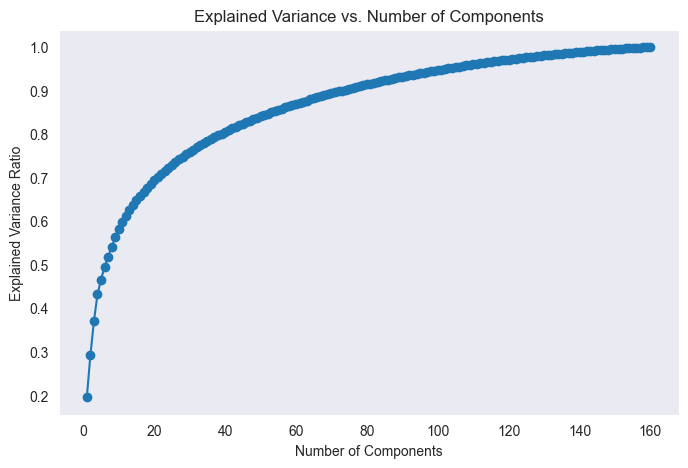

In [10]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

In [11]:
n_components_90 = np.argmax(explained_variance_ratio >= 0.9) + 1
print(f"Number of components explaining 90% variance: {n_components_90}")

Number of components explaining 90% variance: 73


In [12]:
# Обучение классификатора с PCA
pca = PCA(n_components=n_components_90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf_pca = SVC(kernel='linear')
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA ({n_components_90} components): {pca_accuracy:.4f}")

Accuracy with PCA (73 components): 0.5750


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017208272351190886..0.017828802409087054].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.018309105754898584..0.022907827272627593].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017342938336935676..0.021082190855063066].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.019855114260150394..0.024573685926704957].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.022566694594148944..0.023745731735606235].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.024102487330391647..0.024668589185691404]

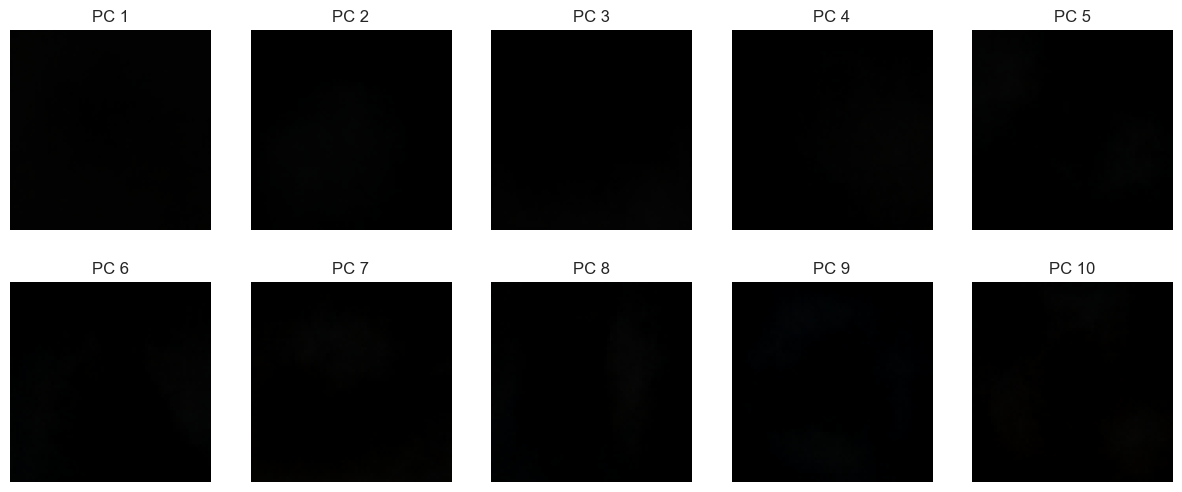

In [13]:
# Визуализация первых 10 главных компонент
components = pca.components_[:10].reshape(10, img_size[0], img_size[1], 3)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(components[i], cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis("off")
plt.show()